In [1]:
# !pip install pillow
# !pip install scikit-learn
# !pip install matplotlib
# !pip install seaborn

In [2]:
%%time
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
import joblib

CPU times: total: 1.25 s
Wall time: 1.46 s


In [3]:
# 讀取csv檔案
df = pd.read_csv("./data/movie_list_20231126.csv")

In [4]:
# 刪除 revenue 為 0 的資料
df = df[df["revenue"] != 0]
df.shape

(10885, 62)

In [5]:
# 刪除 budget 為 0 的資料
df = df[df["budget"] != 0]
df.shape

(7939, 62)

In [6]:
# 刪除 runtime 為 0 的資料
df = df[df["runtime"] != 0]
df.shape

(7907, 62)

In [7]:
# 尚未Released, 卻有票房
df = df[df["status"] == "Released"]

In [8]:
df = df.dropna(subset=["cast"])
df = df.dropna(subset=["director"])
df = df.dropna(subset=["writer"])
df = df.dropna(subset=["production_companies"])
df = df.dropna(subset=["production_countries"])
df = df.dropna(subset=["spoken_languages"])
df.shape

(7309, 62)

In [9]:
# 使用 drop 方法刪除欄
df = df.drop("overview", axis=1)
df = df.drop("cast1", axis=1)
df = df.drop("cast2", axis=1)
df = df.drop("cast3", axis=1)
df = df.drop("cast4", axis=1)
df = df.drop("tagline", axis=1)
df.shape

(7309, 56)

In [10]:
# languages

df["spoken_languages_en"] = 0
df["spoken_languages_other"] = 0



for index, row in df.iterrows():
    if "English" in str(row["spoken_languages"]):
        df.at[index, "spoken_languages_en"] += 1
        df.at[index, "spoken_languages_other"] += row["spoken_languages"].count(",")
    else:
        df.at[index, "spoken_languages_other"] += row["spoken_languages"].count(",")
        df.at[index, "spoken_languages_other"] += 1

In [11]:
# Universal Pictures
Universal = """
Universal International Pictures
DreamWorks Pictures
Focus Features
Focus World
High Top Releasing
Working Title Films
Big Idea Entertainment
Bullwinkle Studios
DreamWorks Animation
DreamWorks Classics
Illumination
Illumination Studios Paris
Universal Animation Studios
Amblin Partners
Carnival Films
Makeready
NBCUniversal Japan
OTL Releasing
United International Pictures
Universal 1440 Entertainment
WT2 Productions
Peacock
Hayu
Vudu
SkyShowtime
"""

In [12]:
Universal = Universal.split("\n")

Universal.pop(0)
Universal.pop(-1)

for i in Universal:
    df["production_companies"] = df["production_companies"].apply(
        lambda x: x.replace(i, "Universal Pictures")
    )

In [13]:
# Paramount
Paramount = """
New Paramount
Paramount Vantage
Miramax
BET Films
MTV Entertainment Studios
Nickelodeon Movies
Paramount Players
Republic Pictures
CBS Eye Animation Productions
Avatar Studios
MTV Animation
Nickelodeon Animation Studio
Paramount Animation
Awesomeness Films
Miramax Family
Paramount Digital Entertainment
United International Pictures
Viacom18 Studios
Paramount Digital Studios
Jio Studios
Paramount+
Pluto TV
BET+
Noggin
Nick+
JioCinema
My5
Philo
SkyShowtime
"""

In [14]:
Paramount = Paramount.split("\n")

Paramount.pop(0)
Paramount.pop(-1)

for i in Paramount:
    df["production_companies"] = df["production_companies"].apply(
        lambda x: x.replace(i, "Paramount")
    )

In [15]:
# Warner Bros. Pictures
Warner = """
DC Films
Warner Bros. Family Entertainment
Warner Bros-Seven Arts
Warner Independent Pictures (WIP)
New Line Cinema
HBO Films
Spyglass Media Group
Rooster Teeth Studios
Discovery Films
TruTV Films
CNN Films
DC Studios
Cartoon Network Movies
Cartoon Network Studios
Wang Film Productions
Warner Bros. Animation
Warner Bros. Japan Anime
Warner Bros. Pictures Animation
Alloy Entertainment
DC Entertainment
Cinemax Films
Flagship Entertainment Group
Castle Rock Entertainment
Turner Entertainment Co.
Warner Bros. Japan
Max
Discovery+
Vudu
Philo
"""

In [16]:
Warner = Warner.split("\n")

Warner.pop(0)
Warner.pop(-1)

for i in Warner:
    df["production_companies"] = df["production_companies"].apply(
        lambda x: x.replace(i, "Warner Bros. Pictures")
    )

In [17]:
# Walt Disney Pictures
Disney = """
Touchstone Pictures
Fox Walt Disney Pictures
Marvel Enterprises
DisneyToon Studios
Disney Television Animatio
Walt Disney Pictures Animation
Walt Disney Feature Animation
Walt Disney Pictures Ltd.
Walt Disney Productions
Fox Film Corporation
Fox Family Films
Fox International Productions
Fox Atomic
Hollywood Pictures
Fox 2000 Pictures
Fox Walt Disney Pictures
20th Century Fox
20th Century Studios
A&E IndieFilms
Disneynature
Hulu Documentary Films
Searchlight Pictures
Disney Channel Original Movies
ESPN Films
NatGeo Doc Films
Lucasfilm
Marvel Studios
Freeform Original Productions
20th Century Animation
Lucasfilm Animation
Marvel Animation
Marvel Studios Animation
Pixar
Walt Disney Animation Studios
20th Century Family
A&E Films
Walt Disney Pictures India
Regency Enterprises
Star Studios
Marvel Entertainment
Vice Films
Walt Disney Studios Motion Pictures
Walt Disney Studios Sony Pictures Releasing
Disney+
Hulu
ESPN+
Disney+ Hotstar
Star+
Movies Anywhere
Philo
"""

In [18]:
Disney = Disney.split("\n")

Disney.pop(0)
Disney.pop(-1)

for i in Disney:
    df["production_companies"] = df["production_companies"].apply(
        lambda x: x.replace(i, "Walt Disney Pictures")
    )

In [19]:
# Columbia Pictures
Columbia = """
Sony Pictures
TriStar Pictures
Sony Pictures Classics
Affirm Films
Ghost Corps
Screen Gems
Stage 6 Films
Crunchyroll, LLC
Crunchyroll Store
Crunchyroll UK and Ireland
Crunchyroll EMEA
Crunchyroll Store Australia
Madhouse
Sony Pictures Animation
Sony Pictures Imageworks
3000 Pictures
Destination Films
Left Bank Pictures
Sony Pictures Japan
Sony Pictures Releasing
Sony Pictures Worldwide Acquisitions
TriStar Productions
Walt Disney Studios Sony Pictures Releasing
Sony Pictures India
Sony Pictures Networks Productions
Sony Pictures Core
SonyLIV
Crunchyroll
Funimation
Great American Pure Flix
"""

In [20]:
Columbia = Columbia.split("\n")

Columbia.pop(0)
Columbia.pop(-1)

for i in Columbia:
    df["production_companies"] = df["production_companies"].apply(
        lambda x: x.replace(i, "Columbia Pictures")
    )

In [21]:
df["production_companies_Warner"] = 0
df["production_companies_Disney"] = 0
df["production_companies_Universal"] = 0
df["production_companies_Columbia"] = 0
df["production_companies_Paramount"] = 0
df["production_companies_other"] = 1

for index, row in df.iterrows():
    df.at[index, "production_companies_other"] += row["production_companies"].count(",")

    if "Warner Bros. Pictures" in str(row["production_companies"]):
        df.at[index, "production_companies_Warner"] += 1

    if "Walt Disney Pictures" in str(row["production_companies"]):
        df.at[index, "production_companies_Disney"] += 1

    if "Universal Pictures" in str(row["production_companies"]):
        df.at[index, "production_companies_Universal"] += 1

    if "Columbia Pictures" in str(row["production_companies"]):
        df.at[index, "production_companies_Columbia"] += 1

    if "Paramount" in str(row["production_companies"]):
        df.at[index, "production_companies_Paramount"] += 1

    df.at[index, "production_companies_other"] = (
        df.at[index, "production_companies_other"]
        - df.at[index, "production_companies_Warner"]
        - df.at[index, "production_companies_Disney"]
        - df.at[index, "production_companies_Universal"]
        - df.at[index, "production_companies_Columbia"]
        - df.at[index, "production_companies_Paramount"]
    )

In [22]:
df["production_countries_USA"] = 0
df["production_countries_other"] = 0

for index, row in df.iterrows():
    if "United States of America" in str(row["production_countries"]):
        df.at[index, "production_countries_USA"] += 1
        df.at[index, "production_countries_other"] += row["production_countries"].count(
            ","
        )
    else:
        df.at[index, "production_countries_other"] += row["production_countries"].count(
            ","
        )
        df.at[index, "production_countries_other"] += 1

In [23]:
# Actor or Actress
AA = """
James Stewart
Gary Cooper
Cary Grant
Humphrey Bogart
Spencer Tracy
Burt Lancaster
Clark Gable
John Wayne
Clint Eastwood
Tom Hanks
Bing Crosby
Gregory Peck
Paul Newman
Lionel Barrymore
Harrison Ford
Fredric March
Myrna Loy
James Cagney
Bette Davis
Jack Nicholson
Meryl Streep
Henry Fonda
Robert Redford
William Holden
Olivia de Havilland
Jack Lemmon
Fred Astaire
Edward G. Robinson
Dustin Hoffman
Anthony Quinn
Tom Cruise
Charles Laughton
Marlon Brando
Gene Hackman
Matt Damon
Alec Guinness
Tyrone Power
Robert Duvall
Katharine Hepburn
William Powell
Lee J. Cobb
Brad Pitt
Samuel L. Jackson
Claudette Colbert
Mickey Rooney
Barbara Stanwyck
Vincent Price
Cate Blanchett
Ginger Rogers
Ingrid Bergman
Judy Garland
Van Johnson
Anne Baxter
Fred MacMurray
David Niven
Charlton Heston
Deborah Kerr
Walter Pidgeon
Philip Seymour Hoffman
Laurence Olivier
Kirk Douglas
Loretta Young
Frank Sinatra
Scarlett Johansson
James Mason
Glenn Ford
Morgan Freeman
Gene Kelly
Maureen O'Hara
Joseph Cotten
Denzel Washington
Leonardo DiCaprio
Ronald Colman
Errol Flynn
Susan Hayward
Lee Marvin
Marlene Dietrich
Robert Mitchum
Ray Milland
Jean Arthur
Robert DeNiro
Johnny Depp
Wallace Beery
Emma Thompson
Christopher Plummer
George Clooney
Dana Andrews
Van Heflin
Rosalind Russell
Irene Dunne
Robert Taylor
Jane Wyman
Tony Curtis
Al Pacino
Walter Matthau
Doris Day
Michael Caine
Dick Powell
Christian Bale
Bill Murray
Bob Hope
William Hurt
Greer Garson
Charles Boyer
Joan Fontaine
Jean Simmons
Liam Neeson
Mel Gibson
Robert Downey Jr.
Donna Reed
Gene Tierney
Shirley Temple
Maureen O'Sullivan
Laurence Fishburne
Sigourney Weaver
Richard Widmark
Gwyneth Paltrow
Ed Harris
Sidney Poitier
Sean Connery
John Garfield
Robert Young
Rock Hudson
Donald Sutherland
Joan Crawford
Elizabeth Taylor
Woody Allen
Audrey Hepburn
Randolph Scott
Natalie Wood
Don Ameche
Ernest Borgnine
Leslie Howard
Jeremy Renner
Dorothy McGuire
Kurt Russell
Tommy Lee Jones
Harvey Keitel
John Gielgud
John Lithgow
Diane Keaton
Robert Montgomery
Dean Martin
Joel McCrea
Josh Brolin
Albert Finney
Gary Oldman
Vivien Leigh
Montgomery Clift
Pat O'Brien
Shirley MacLaine
Richard Harris
Steve McQueen
Marilyn Monroe
Debbie Reynolds
Jeff Bridges
Jeff Goldblum
Amy Adams
Mark Ruffalo
Janet Leigh
Jane Fonda
Emma Watson
Robin Williams
Joan Blondell
Lana Turner
John Goodman
Julie Christie
Rita Hayworth
Monty Woolley
Woody Harrelson
June Allyson
Anthony Hopkins
Jude Law
Daniel Day-Lewis
Orson Welles
James Garner
Bruce Dern
Peter O'Toole
Anne Bancroft
Eleanor Parker
Jennifer Jones
Joan Bennett
Lucille Ball
Bill Paxton
Michelle Pfeiffer
Robert Cummings
Julianne Moore
Danny DeVito
Julie Andrews
Richard Burton
Alice Faye
Bruce Willis
Jeanette MacDonald
Betty Grable
Kevin Bacon
Jeff Daniels
Alan Ladd
Paulette Goddard
John Barrymore
Jon Voight
Chris Pratt
George Raft
Danny Glover
Forest Whitaker
Donald O'Connor
Teresa Wright
Deanna Durbin
Sally Field
Adam Driver
Russell Crowe
Grace Kelly
Tom Hardy
Lauren Bacall
Mary Pickford
Kevin Costner
José Ferrer
Michael Douglas
Steve Carell
Viggo Mortensen
Colin Firth
Ann Sheridan
Ben Kingsley
Seth Rogen
Danny Kaye
Chris Hemsworth
Susan Sarandon
Joe E. Brown
Jodie Foster
Frances McDormand
Lillian Gish
Janet Gaynor
Ruth Hussey
Robert Wagner
Ewan McGregor
Albert Brooks
Ava Gardner
Rex Harrison
Douglas Fairbanks Jr.
Linda Darnell
Jessica Tandy
Richard Dreyfuss
Sissy Spacek
Edward Norton
Kevin Spacey
George C. Scott
Greta Garbo
Orlando Bloom
Carrie Fisher
Nicole Kidman
Laura Dern
Abbott & Costello
Mark Hamill
Simon Pegg
Kate Winslet
Gloria Grahame
Broderick Crawford
Boris Karloff
Ben Affleck
Helen Mirren
Vin Diesel
Dennis Hopper
Glenn Close
Ida Lupino
Christopher Walken
Rod Steiger
Jeanne Crain
Paul Muni
James Caan
Dennis Morgan
Barbra Streisand
Robert Shaw
Rod Taylor
Julia Roberts
Keira Knightley
Bradley Cooper
Margaret O'Brien
Joseph Gordon-Levitt
Clifton Webb
Victor Mature
Charles Chaplin
Jack Black
Mark Wahlberg
Betty Hutton
Jean Harlow
Mel Brooks
Sean Penn
Joaquin Phoenix
Tim Robbins
Chiwetel Ejiofor
Cliff Robertson
Hugh Jackman
Michael Keaton
Jerry Lewis
Eddie Murphy
Jennifer Lawrence
Robert Walker
Karen Gillan
Viola Davis
Debra Paget
Sam Rockwell
James Coburn
Sal Mineo
Jim Carrey
Benicio Del Toro
Cyd Charisse
Ellen Burstyn
Norma Shearer
Bryan Cranston
Carole Lombard
Merle Oberon
John Malkovich
Daniel Craig
Whoopi Goldberg
Dick Van Dyke
John Cusack
Virginia Mayo
Daniel Radcliffe
Peter Sellers
Hugh Grant
Steve Martin
Will Smith
Jessica Chastain
Owen Wilson
Ann Miller
George Segal
Chris Evans
James Dean
Ryan Gosling
Michael Shannon
Nicolas Cage
Keanu Reeves
Matthew McConaughey
Geena Davis
Cornel Wilde
Gene Wilder
Patricia Neal
Jake Gyllenhaal
Ronald Reagan
Red Skelton
Dan Aykroyd
Zoe Saldana
Sylvia Sidney
Tom Holland
Sylvester Stallone
Matthew Broderick
Kevin Kline
Alan Arkin
Nick Nolte
Holly Hunter
Anthony Perkins
Ben Stiller
Vanessa Redgrave
Idris Elba
Kay Francis
Elliott Gould
James McAvoy
Toni Collette
Omar Sharif
Dennis Quaid
Faye Dunaway
Martin Sheen
Warren Beatty
Nelson Eddy
Annette Bening
Emily Blunt
Lee Remick
Laurel and Hardy
Paul Rudd
Richard Pryor
Billy Dee Williams
Oscar Levant
Richard Gere
Marie Dressler
John Travolta
Renée Zellweger
Veronica Lake
Natalie Portman
Hedy Lamarr
Helen Hayes
Drew Barrymore
Robert Donat
Joanne Woodward
Jamie Foxx
Emma Stone
Cameron Diaz
Kim Novak
Jessica Lange
Sandra Bullock
Anne Hathaway
Michael Fassbender
Red Buttons
Burt Reynolds
Laura Linney
Kathryn Grayson
Margaret Sullavan
Dwayne Johnson
Buster Keaton
James Franco
Esther Williams
Ethan Hawke
Oprah Winfrey
Hayley Mills
Oscar Isaac
Chris Pine
Charles Bronson
Angela Bassett
Lena Horne
Jeremy Irons
Priscilla Lane
Geraldine Page
Colin Farrell
Eva Marie Saint
Roy Scheider
Yul Brynner
Arnold Schwarzenegger
Marx Brothers
Charlize Theron
Shia LaBeouf
Margot Robbie
Farley Granger
Malcolm McDowell
Eleanor Powell
Winona Ryder
Heath Ledger
Tony Randall
Michael J. Fox
Howard Keel
Jennifer Connelly
Antonio Banderas
Leslie Caron
Brian Keith
Alan Alda
Joel Edgerton
Rhonda Fleming
Jeff Chandler
Gail Russell
Brie Larson
Channing Tatum
Rachel Weisz
Andy Garcia
Angelina Jolie
Jared Leto
John Candy
Anna Kendrick
Goldie Hawn
Candice Bergen
William Shatner
Diane Lane
Yvonne De Carlo
Reese Witherspoon
Billy Crystal
Mitzi Gaynor
Harry Belafonte
Eddie Redmayne
Richard Egan
Sophia Loren
Val Kilmer
June Haver
Sandra Dee
Lizabeth Scott
Gal Gadot
Ann-Margret
Adam Sandler
Kevin Hart
John Krasinski
Debra Winger
Cher
Jane Russell
Tim Allen
Kathleen Turner
Audie Murphy
Halle Berry
Jason Bateman
Elvis Presley
Jamie Lee Curtis
Meg Ryan
Will Ferrell
Pierce Brosnan
Sonja Henie
Helen Hunt
Glenda Jackson
Matt Dillon
Jane Powell
George Peppard
Vince Vaughn
Demi Moore
Mae West
Ice Cube
Denis Leary
Melanie Griffith
Dorothy Dandridge
Wesley Snipes
Jennifer Garner
Kim Basinger
Ryan Reynolds
Taraji P. Henson
Peter Fonda
Paul Walker
Bette Midler
Liza Minnelli
Robert Pattinson
Kate Beckinsale
Gina Lollobrigida
Tab Hunter
Chevy Chase
Penélope Cruz
Gerard Butler
Melissa McCarthy
Charlie Sheen
Rutger Hauer
Ryan O'Neal
Martin Lawrence
Jason Statham
Michael B. Jordan
Marsha Mason
Carol Burnett
Roger Moore
Frances Farmer
Luke Wilson
Macaulay Culkin
Angie Dickinson
Jennifer Aniston
Mickey Rourke
Dyan Cannon
Jennifer Lopez
Christopher Reeve
Christian Slater
Pam Grier
Brendan Fraser
Andy Samberg
Jim Brown
Christina Ricci
Michael Biehn
George Arliss
Sharon Stone
Regina Hall
Andy Griffith
Justin Timberlake
Blake Lively
Hilary Swank
Tyler Perry
Patrick Swayze
Steve Guttenberg
Mila Kunis
Rami Malek
Raquel Welch
Dudley Moore
Anna Faris
Art Carney
Sondra Locke
Deepika Padukone
Zac Efron
Jayne Mansfield
Steven Seagal
Milla Jovovich
Emilio Estevez
Annette Funicello
Jean-Claude Van Damme
Molly Ringwald
Tim Conway
Tom Selleck
Dan Patrick
Chuck Norris
Judd Nelson
"""

In [24]:
AA = AA.split("\n")

AA.pop(0)
AA.pop(-1)

df["starts564"] = 0

for index, row in df.iterrows():
    for i in AA:
        if i in str(row["cast"]):
            df.at[index, "starts564"] += 1

In [25]:
AA = AA[:300]

df["starts300"] = 0

for index, row in df.iterrows():
    for i in AA:
        if i in str(row["cast"]):
            df.at[index, "starts300"] += 1

In [26]:
AA = AA[:100]

df["starts100"] = 0

for index, row in df.iterrows():
    for i in AA:
        if i in str(row["cast"]):
            df.at[index, "starts100"] += 1

In [27]:
# 將知名演員拆成 1~100 / 101~300 / 301~564 3個欄位

df["starts300"] = df["starts300"] - df["starts100"]
df["starts564"] = df["starts564"] - df["starts300"] - df["starts100"]

In [28]:
# director

Directors = """
Steven Spielberg
James Cameron
Anthony Russo
Joe Russo
Peter Jackson
Michael Bay
David Yates
Christopher Nolan
J.J. Abrams
Ridley Scott
Tim Burton
Robert Zemeckis
Jon Favreau
Ron Howard
Sam Raimi
Chris Columbus
Roland Emmerich
Jon Watts
James Wan
Pierre Coffin
Bryan Singer
Gore Verbinski
Francis Lawrence
George Lucas
Brad Bird
Clint Eastwood
Chris Renaud
Todd Phillips
Zack Snyder
M. Night Shyamalan
Kyle Balda
Sam Mendes
Carlos Saldanha
Bill Condon
Justin Lin
Joss Whedon
Tom McGrath
Chris Buck
Andrew Stanton
Guy Ritchie
Jennifer Lee
Shawn Levy
Rob Marshall
James Gunn
Colin Trevorrow
Andrew Adamson
Conrad Vernon
John Lasseter
Eric Darnell
Barry Sonnenfeld
James Mangold
Ryan Coogler
Steven Soderbergh
Tsui Hark
Martin Scorsese
Kaige Chen
Christopher McQuarrie
Jon Turteltaub
Pete Docter
F. Gary Gray
Richard Donner
Joseph Kosinski
Matt Reeves
Jake Kasdan
Peyton Reed
Brett Ratner
Byron Howard
Tony Scott
David Fincher
Martin Campbell
Rob Minkoff
Andy Wachowski
Zhang Yimou
Rich Moore
Louis Leterrier
Kenneth Branagh
Quentin Tarantino
Chen Sicheng
Raja Gosnell
David Leitch
Lee Unkrich
Rian Johnson
Wolfgang Petersen
Dante Lam
Ivan Reitman
Dennis Dugan
Jay Roach
Mike Newell
Garry Marshall
Taika Waititi
Ron Clements
Greta Gerwig
Mike Mitchell
Joe Johnston
Marc Forster
John Musker
Ang Lee
Gareth Edwards
Rob Letterman
Joel Schumacher
Paul W.S. Anderson
Alfonso Cuarón
Dean DeBlois
Ruben Fleischer
Juan Antonio Bayona
Robert Rodriguez
Andy Muschietti
Paul Greengrass
Peter Berg
Tom Shadyac
Antoine Fuqua
Stephen Sommers
Marc Webb
Matthew Vaughn
Peter Farrelly
Doug Liman
Chris Weitz
Fan Guo
Kelly Asbury
Lana Wachowski
Shane Black
Bobby Farrelly
Jon M. Chu
Steve Martino
Tim Story
Hao Ning
Chris Sanders
Jaume Collet-Serra
Aaron Horvath
Rob Cohen
Scott Derrickson
Edward Zwick
Genndy Tartakovsky
Barry Levinson
Michael Jelenic
Chris Miller
Nancy Meyers
John Woo
Kirk Wise
Brad Peyton
Woody Allen
Oliver Stone
Sylvester Stallone
Joachim Ronnin
Hu Guan
Sydney Pollack
Luc Besson
Jan De Bont
George Miller
Guillermo del Toro
John McTiernan
Phil Lord
Christopher Miller
Hayao Miyazaki
Phillip Noyce
Paul Feig
Jennifer Yuh Nelson
Peter Segal
Renny Harlin
Gary Ross
Adam Shankman
Baz Luhrmann
Roger Allers
Michael Apted
Joel Coen
Simon West
Mel Gibson
Ryan Fleck
Muye Wen
Anna Boden
David Ayer
David Silverman
Robert Schwentke
Joseph McGinty Nichol
Alan Taylor
Josh Cooley
Denis Villeneuve
Paul Verhoeven
Wu Jing
Jonathan Liebesman
Lasse Hallström
Patty Jenkins
Mike Nichols
Michael Mann
Brian De Palma
Garth Jennings
Tim Miller
Peter Sohn
Tyler Perry
Chad Stahelski
Stephen Chow
Betty Thomas
Tom Hooper
Frank Coraci
Chris Williams
Francis Ford Coppola
Tim Johnson
John Landis
Danny Boyle
Rawson Marshall Thurber
Rob Reiner
Andy Tennant
Gary Trousdale
David F. Sandberg
Adrian Lyne
Andrew Davis
Adam McKay
Wes Ball
Xu Zheng
James Foley
Jerry Zucker
Paul Weitz
David O. Russell
D.J. Caruso
Wes Craven
John Glen
Brian Levant
Kevin Lima
Mark Waters
Don Hall
Michael Thurmeier
Will Gluck
Nora Ephron
Peter Weir
Alejandro Gonzalez Inarritu
Vicky Jenson
Makoto Shinkai
Seth MacFarlane
Chuck Russell
Darren Aronofsky
Jia Ling
Nicholas Stoller
John Badham
Espen Sandberg
David Gordon Green
David Frankel
Len Wiseman
Cary Joji Fukunaga
Kevin Reynolds
Robert Luketic
David Slade
Tim Hill
Frank Oz
Brenda Chapman
Brad Silberling
Robert Stromberg
Cameron Crowe
Roger Donaldson
Alex Proyas
Malcolm D. Lee
Dan Scanlon
Yang Yu
John G. Avildsen
Joe Wright
Lee Tamahori
Mark Osborne
Seth Gordon
Jonathan Mostow
John Stevenson
Irvin Kershner
Neill Blomkamp
Raman Hui
Yibai Zhang
William Friedkin
Steve Carr
Timur Bekmambetov
Sean Anders
Jonathan Demme
Curtis Hanson
Chris Wedge
Michael Patrick King
Jeff Fowler
David Zucker
Phyllida Lloyd
Judd Apatow
Jason Reitman
Joel Crawford
John Singleton
Kemp Powers
Justin K. Thompson
Joaquim Dos Santos
Peter Ramsey
Jordan Peele
Roger Spottiswoode
Anne Fletcher
Alan J. Pakula
Keenen Ivory Wayans
Wong Jing
Stephen Herek
John Madden
Steven Caple Jr
Donald Petrie
Damien Chazelle
James Bobin
Walt Becker
Herman Yau
Wuershan
Taylor Hackford
John Krasinski
Xue Xiaolu
Andrew Lau
Andy Fickman
David Dobkin
Ben Stiller
James L. Brooks
Larry Charles
Wes Anderson
Stephen Frears
Harold Ramis
Han Han
Catherine Hardwicke
Michael Chaves
Duncan Jones
Gavin Hood
Spike Lee
Herbert Ross
Nathan Greno
Karey Kirkpatrick
John Lee Hancock
Sam Taylor-Johnson
Mick Jackson
Norman Jewison
Ol Parker
Kirk De Micco
Jeff Tremaine
Shen Ao
Baltasar Kormakur
Rupert Sanders
Randal Kleiser
Neil Burger
Jordan Vogt-Roberts
Jim Abrahams
Harald Zwart
Mark Andrews
Robert Wise
Peter Hyams
Morten Tyldum
Nick Cassavetes
Richard Marquand
Martin Brest
Travis Knight
Adam Wingard
Guy Hamilton
Emile Ardolino
Ethan Coen
Roger Michell
Anthony Minghella
Gabriele Muccino
Haruo Sotozaki
Phil Johnston
Kent Seki
Wilson Yip
Yan Han
Tarsem Singh
Ben Affleck
P.J. Hogan
Alessandro Carloni
Rupert Wyatt
Olivier Nakache
Eric Toledano
Amy Heckerling
Kevin Costner
Scott Mosier
Yarrow Cheney
Alexander Payne
Destin Daniel Cretton
Mimi Leder
Andy Serkis
Steve Hickner
Jean-Jacques Annaud
Darren Lynn Bousman
Xiang Liu
Daniel Espinosa
Walter Hill
John Moore
Rui Cui
David Bowers
Tate Taylor
Dominic Sena
Mark Dindal
Elizabeth Banks
Sharon Maguire
Gus Van Sant
Cal Brunker
Michael Gracey
Jon Amiel
Mark Steven Johnson
George Cukor
Chengpeng Dong
Xiaozhi Rao
Penny Marshall
Nick Park
Neil Jordan
Takashi Yamazaki
Daniel Lee
Brian Robbins
Xiaogang Feng
Joseph Ruben
Greg Tiernan
Patrick Hughes
Robert Redford
Chiyu Zhang
Terry Gilliam
Edgar Wright
Les Mayfield
Tony Gilroy
Wolfgang Reitherman
Peter Chelsom
David R. Ellis
Joe Dante
Dean Parisot
Olivier Megaton
Joon-ho Bong
Tian Yusheng
Chirs Buck
Eric Brevig
Paul King
Michael Dougherty
Chloé Zhao
George Roy Hill
S.S. Rajamouli
Ariel Schulman
Henry Joost
Eli Roth
Roman Polanski
Stephen Hopkins
Blake Edwards
Clyde Geronimi
Arthur Hiller
Bradley Cooper
Victor Fleming
Craig Gillespie
Joel Zwick
John Francis Daley
Jonathan Goldstein
Jean-Pierre Jeunet
Marc Lawrence
George P. Cosmatos
Bilall Fallah
Adil El Arbi
Alex Kurtzman
Jimmy Hayward
Josh Gordon
Will Speck
Wang Baoqiang
Brian Helgeland
Frank Darabont
David Soren
Jason Friedberg
Steve Oedekerk
Sam Wood
Ben Wheatley
Lawrence Kasdan
Bruce Beresford
Mikael Hafstrom
Michael Lembeck
Pedro Almodovar
Thor Freudenthal
Tyler Gillett
Matt Bettinelli-Olpin
Mike Thurmeier
Ken Kwapis
Leonard Nimoy
Bibo Bergeron
Stanley Tong
Simon Wells
Stanley Kubrick
Mel Brooks
Xing Wenxiong
Cate Shortland
Stephen Daldry
Brian Fee
George Clooney
John Hamburg
Adam Robitel
Sidney Lumet
Jill Culton
Albert Hughes
Kathryn Bigelow
Sam Fell
John Pasquin
Bob Persichetti
Rodney Rothman
Pierre Morel
Kirk Jones
Don Bluth
Florian Henckel von Donnersmarck
Michel Gondry
Stephen Gaghan
Tom Dey
Richard Curtis
Simon J. Smith
Lu Yang
Steve Miner
Ralph Zondag
Corin Hardy
Peter Lord
Glenn Ficarra
John Requa
Frank Marshall
Stephen Chbosky
Scott Moore
Jon Lucas
Tom Tykwer
Chris McKay
Eric Leighton
Penelope Spheeris
Michael Moore
James Wong
Lawrence Guterman
Fergal Reilly
Clay Kaytis
Josh Boone
Hal Needham
Chao Deng
Hugh Wilson
Alan Parker
Warren Beatty
Michael Caton-Jones
Noam Murro
Steven Brill
Michael Ritchie
David Lam
Peter Hewitt
Joe Carnahan
Jonathan Frakes
Robert Altman
Baimei Yu
Randall Wallace
Peter Faiman
Jon Avnet
Rob Bowman
Alexandre Aja
Scott Waugh
Olivier Magaton
Gary Winick
Howard Deutch
Allen Hughes
Jonathan Levine
Richard Linklater
Wayne Wang
John Hughes
James DeMonaco
Greg Mottola
Tommy Wirkola
Steven Quale
Roger Kumble
Kevin Greutert
Beeban Kidron
Jackie Chan
Paul Thomas Anderson
Harold Becker
Jose Padilha
Alejandro Amenábar
Miloš Forman
Ron Shelton
Christopher Landon
Andrew Niccol
Nitesh Tiwari
George Tillman, Jr
Paul Tibbitt
Stephen Norrington
Phil Alden Robinson
Breck Eisner
John Carpenter
Tony Chan
Richard Attenborough
XiaoPeng Tian
Gregory Hoblit
David Green
Charles Shyer
Gary Fleder
Kenny Ortega
Andrzej Bartkowiak
Joe Roth
Simon Wincer
Marcus Nispel
Emma Tammi
Fede Álvarez
Hoyt H. Yeatman
Luke Greenfield
David Twohy
Josh Trank
Cheang Pou-Soi
Carl Reiner
Aaron Seltzer
Steven S. DeKnight
David Lean
Jesse Dylan
Benny Chan
Richard Benjamin
Theodore Melfi
Greg MacGillivray
Soi Cheang
Chris Noonan
Martin McDonagh
John R. Leonetti
Peter Cattaneo
Takehiko Inoue
Richard LaGravenese
"""

In [29]:
Directors = Directors.split("\n")

Directors.pop(0)
Directors.pop(-1)

df["director_top"] = 0
df["director_other"] = 1

for index, row in df.iterrows():
    df.at[index, "director_other"] += row["director"].count(",")

    for i in Directors:
        if i in str(row["director"]):
            df.at[index, "director_top"] += 1

    df.at[index, "director_other"] -= df.at[index, "director_top"]

In [30]:
df = df.drop("status", axis=1)
df = df.drop("original_language", axis=1)
df = df.drop("original_title", axis=1)
df = df.drop("genres", axis=1)
df = df.drop("production_companies", axis=1)
df = df.drop("production_countries", axis=1)
df = df.drop("spoken_languages", axis=1)
df = df.drop("director", axis=1)
df = df.drop("writer", axis=1)
df = df.drop("cast", axis=1)
df = df.drop("oscarNominationCategory", axis=1)
df = df.drop("oscarWinnerCategory", axis=1)

In [31]:
df["final_rating"] = 0.0
df["final_vote"] = 0.0

for index, row in df.iterrows():
    df.at[index, "final_vote"] = row["vote_count"] + row["numVotes"]
    if df.at[index, "final_vote"] != 0:
        df.at[index, "final_rating"] = (
            df.at[index, "vote_count"] * df.at[index, "vote_average"]
            + df.at[index, "numVotes"] * df.at[index, "rating"]
        ) / df.at[index, "final_vote"]

In [32]:
df = df.drop("Adult", axis=1)
df = df.drop("Biography", axis=1)
df = df.drop("GameShow", axis=1)
df = df.drop("Musical", axis=1)
df = df.drop("News", axis=1)
df = df.drop("RealityTV", axis=1)
df = df.drop("Sport", axis=1)
df = df.drop("TalkShow", axis=1)

In [33]:
df = df.drop("vote_average", axis=1)
df = df.drop("vote_count", axis=1)
df = df.drop("numVotes", axis=1)
df = df.drop("rating", axis=1)

In [34]:
# continuous variable 連續型變數

continuous = [
    "runtime",
    "isAdult",
    "budget",
    "popularity",
    "oscarNominations",
    "oscarWinner",
    "isActingWinner",
    "spoken_languages_en",
    "spoken_languages_other",
    "production_companies_Warner",
    "production_companies_Disney",
    "production_companies_Universal",
    "production_companies_Columbia",
    "production_companies_Paramount",
    "production_companies_other",
    "production_countries_USA",
    "production_countries_other",
    "starts564",
    "starts300",
    "starts100",
    "director_top",
    "director_other",
    "final_rating",
    "final_vote",
    "revenue",
]

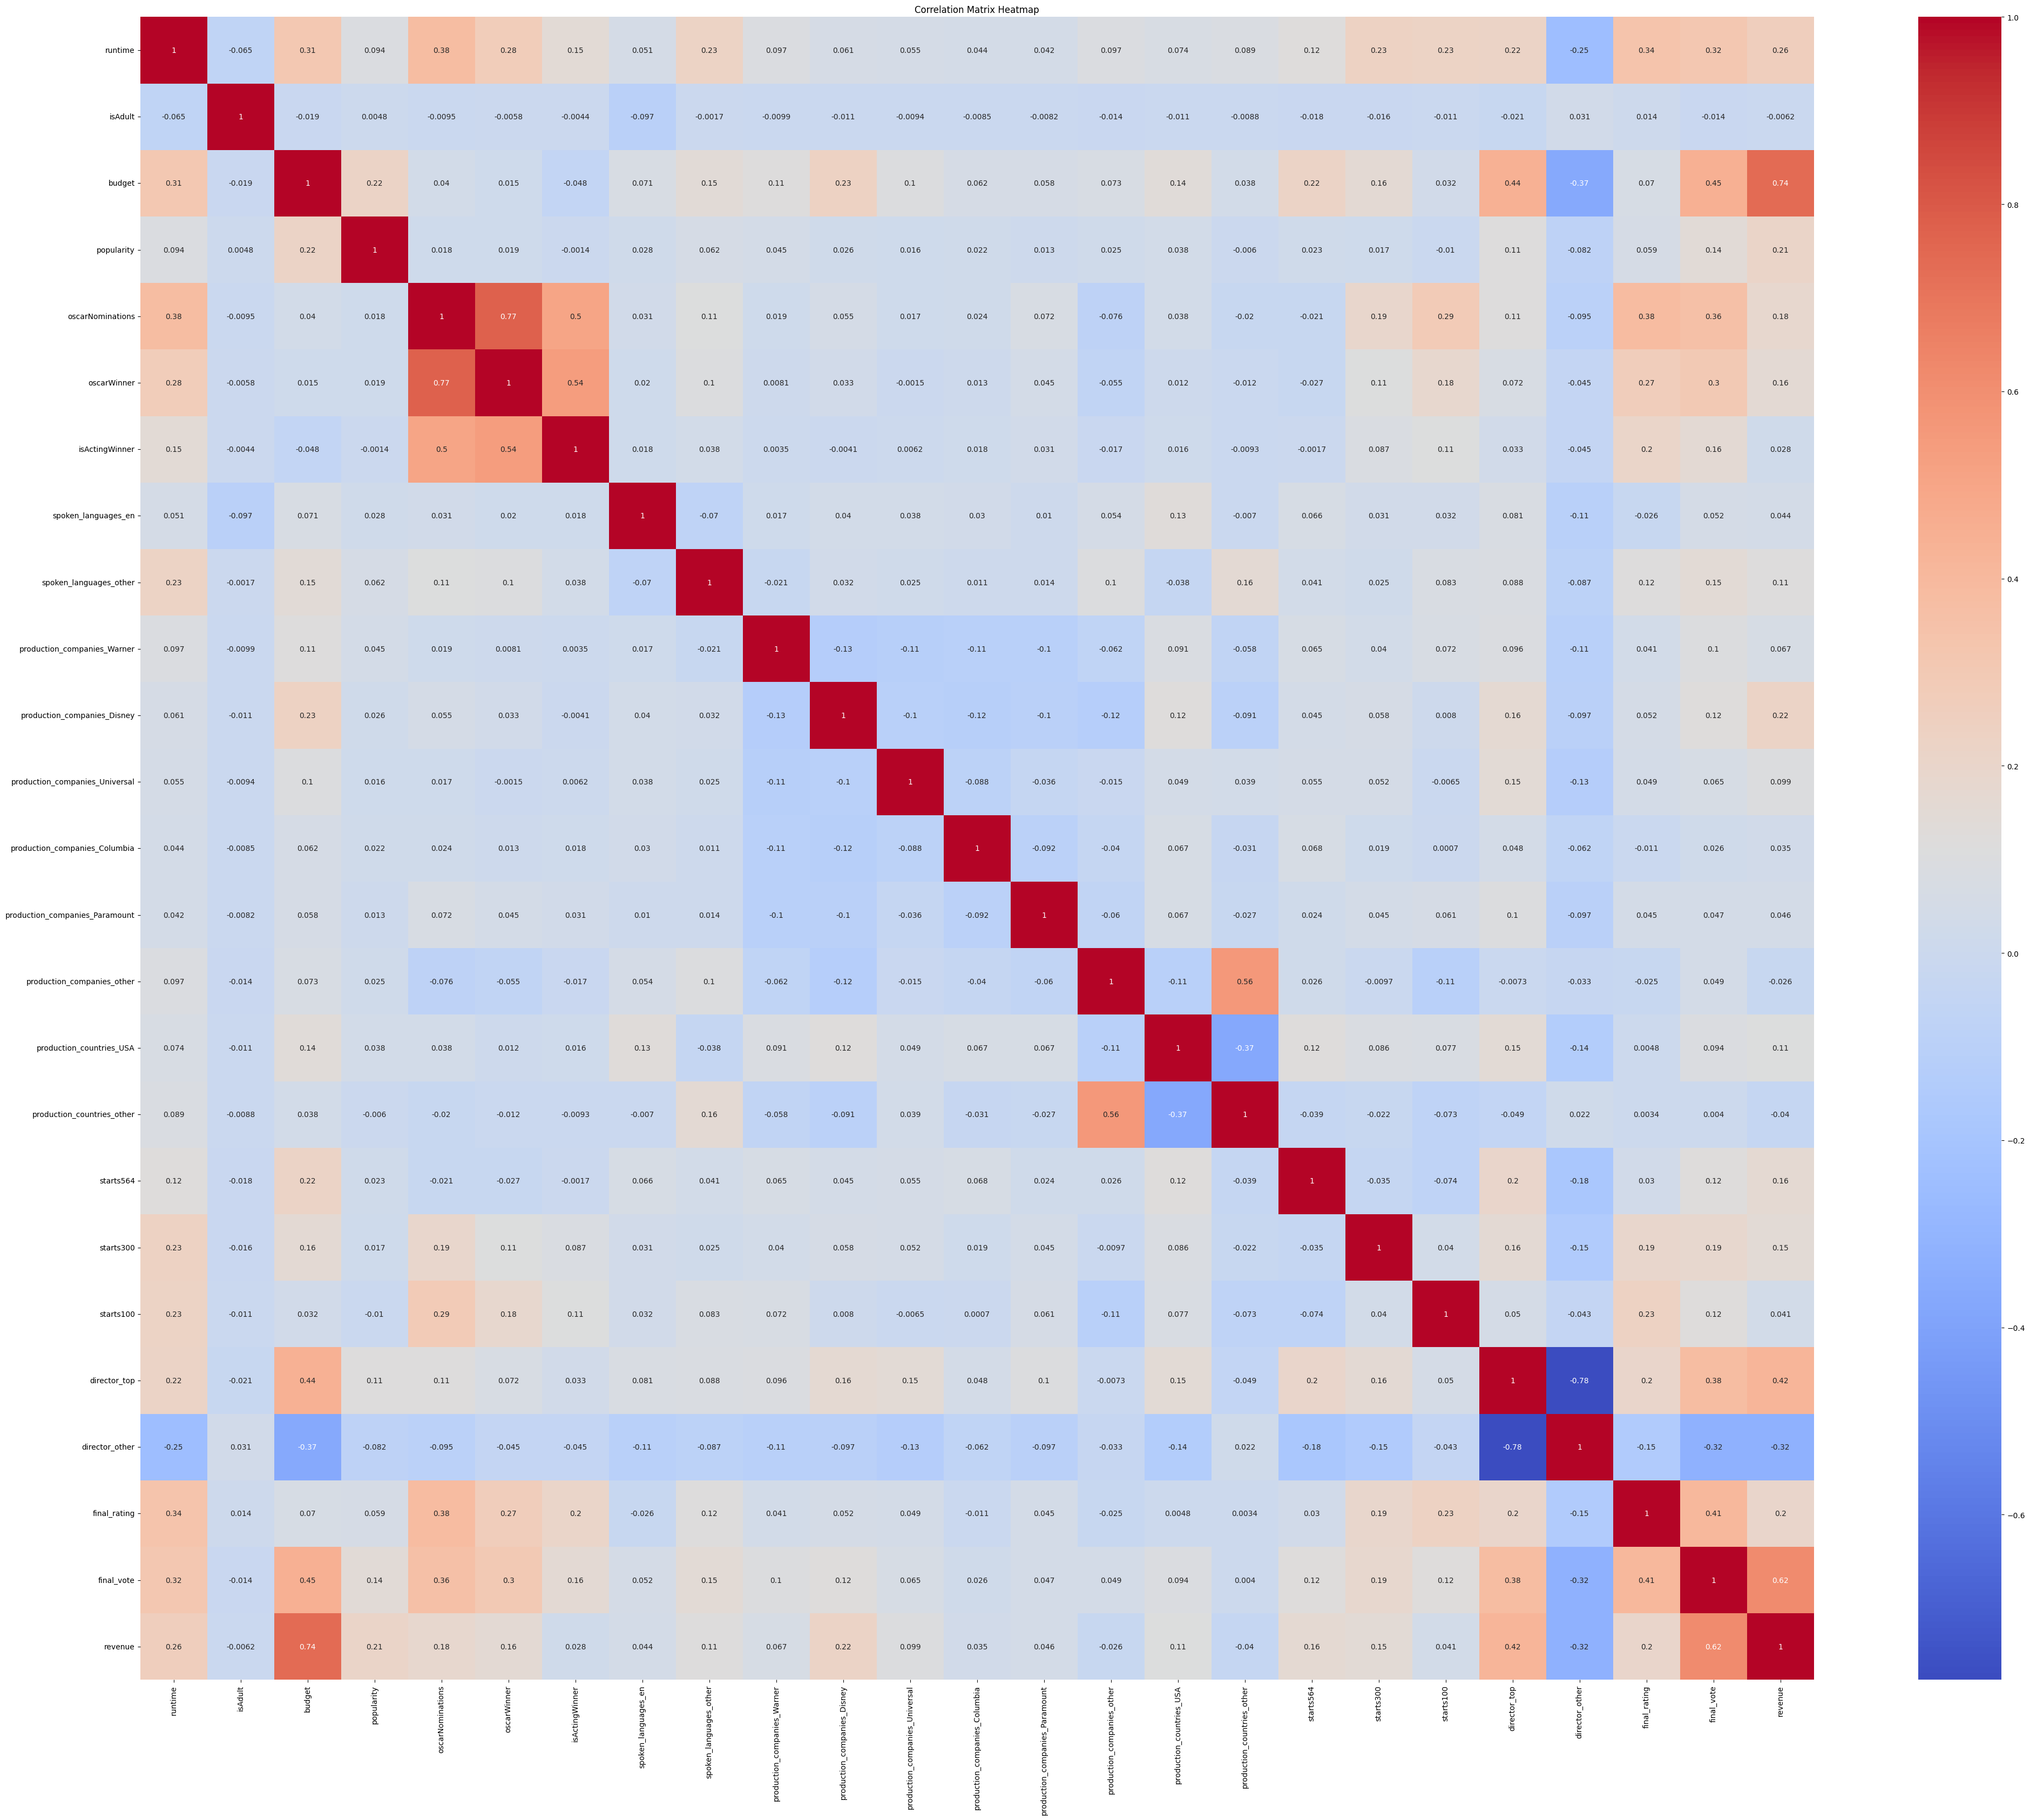

In [35]:
# 創建相關矩陣
correlation_matrix = df[continuous].corr()

# 繪製熱力圖
plt.figure(figsize=(50, 40))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix Heatmap")
plt.show()

In [36]:
X = (
    df.drop("id", axis=1)
    .drop("imdb_id", axis=1)
    .drop("title", axis=1)
    .drop("release_date", axis=1)
    .drop("revenue", axis=1)
)
y = df["revenue"]

print(X.shape)
print(y.shape)

(7309, 44)
(7309,)


In [37]:
def evaluate_model(model, X_test, y_test):
    # 進行預測
    y_pred = model.predict(X_test)

    # 計算評估指標
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # 顯示評估結果
    print(f"Mean Squared Error: {mse}")
    print(f"Mean Absolute Error: {mae}")
    print(f"R^2 Score: {r2}")

In [38]:
def train_random_forest(X, y, n):
    # 拆分數據集
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=87
    )

    y_train = y_train.ravel()
    y_test = y_test.ravel()

    # 設定要嘗試的超參數範圍
    param_grid = {
        "n_estimators": [800],  # 樹的數量
        "max_features": ["sqrt"],  # 劃分時考慮的最大特徵數 # log2
        "max_depth": [None],  # 樹的最大深度 # max_depth=14 16 18 20
        "criterion": [
            "absolute_error"
        ],  # 劃分樹時的評估標準 ("squared_error", "friedman_mse", "poisson", "absolute_error",)
    }

    # 創建隨機森林模型
    rf_model = RandomForestRegressor(random_state=87)

    # 使用 GridSearchCV 進行超參數搜尋
    grid_search = GridSearchCV(
        estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2
    )

    # 適用於訓練集
    grid_search.fit(X_train, y_train)

    # 輸出最佳參數和評分
    print("Best Parameters:", grid_search.best_params_)
    print("Best Score:", grid_search.best_score_)
    print()

    evaluate_model(grid_search.best_estimator_, X_test, y_test)
    print()

    # 假設你的模型是 best_estimator_
    # 訓練好模型後，保存模型
    joblib.dump(grid_search.best_estimator_, f"./model/rf_model{n}.pkl")

    # 獲取特徵重要性
    feature_importance = grid_search.best_estimator_.feature_importances_

    # 獲取特徵名稱
    feature_names = X.columns

    # 顯示特徵名稱及其對應的重要性
    for name, importance in zip(feature_names, feature_importance):
        print(f"{name}: {importance}")

In [39]:
# 1 是 輸出後會存到./model/rf_model1.pkl
train_random_forest(X, y, 1)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best Parameters: {'criterion': 'absolute_error', 'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 800}
Best Score: 0.7336267481468206

Mean Squared Error: 8788998155625084.0
Mean Absolute Error: 39103773.55807584
R^2 Score: 0.7455843382697586

runtime: 0.05784716575148109
isAdult: 0.00019800703729851266
budget: 0.17024813162528388
popularity: 0.13590365330215093
Action: 0.011237997047766526
Adventure: 0.018260692932864076
Animation: 0.008247233953594328
Comedy: 0.009431933959175387
Crime: 0.006430757937387604
Documentary: 0.00016332370537909004
Drama: 0.01125220225557813
Family: 0.010246600438980982
Fantasy: 0.00994695595088257
History: 0.002996624725410263
Horror: 0.004469223840048748
Music: 0.0031153282283002148
Mystery: 0.004624508003656208
Romance: 0.007640115357844295
SciFi: 0.008124676390069549
Short: 3.814760921757242e-07
Thriller: 0.007945078402998424
TV_Movie: 0.0002123046924233762
War: 0.0022685323447811725


In [40]:
# 讀取2024年的csv檔案
df24 = pd.read_json("./data/movie_prediction_list.json")

In [41]:
df24 = df24[df24["budget"] != 0]
df24 = df24[df24["runtime"] != 0]

df24 = df24.dropna(subset=["cast"])
df24 = df24.dropna(subset=["director"])
df24 = df24.dropna(subset=["writer"])
df24 = df24.dropna(subset=["production_companies"])
df24 = df24.dropna(subset=["production_countries"])
df24 = df24.dropna(subset=["spoken_languages"])

df24 = df24.drop("overview", axis=1)
df24 = df24.drop("cast1", axis=1)
df24 = df24.drop("cast2", axis=1)
df24 = df24.drop("cast3", axis=1)
df24 = df24.drop("cast4", axis=1)
df24 = df24.drop("tagline", axis=1)

df24["spoken_languages_en"] = 0
df24["spoken_languages_other"] = 0

for index, row in df24.iterrows():
    if "English" in str(row["spoken_languages"]):
        df24.at[index, "spoken_languages_en"] += 1
        df24.at[index, "spoken_languages_other"] += row["spoken_languages"].count(",")
    else:
        df24.at[index, "spoken_languages_other"] += row["spoken_languages"].count(",")
        df24.at[index, "spoken_languages_other"] += 1

for i in Universal:
    df24["production_companies"] = df24["production_companies"].apply(
        lambda x: x.replace(i, "Universal Pictures")
    )

for i in Paramount:
    df24["production_companies"] = df24["production_companies"].apply(
        lambda x: x.replace(i, "Paramount")
    )

for i in Warner:
    df24["production_companies"] = df24["production_companies"].apply(
        lambda x: x.replace(i, "Warner Bros. Pictures")
    )

for i in Disney:
    df24["production_companies"] = df24["production_companies"].apply(
        lambda x: x.replace(i, "Walt Disney Pictures")
    )

for i in Columbia:
    df24["production_companies"] = df24["production_companies"].apply(
        lambda x: x.replace(i, "Columbia Pictures")
    )

df24["production_companies_Warner"] = 0
df24["production_companies_Disney"] = 0
df24["production_companies_Universal"] = 0
df24["production_companies_Columbia"] = 0
df24["production_companies_Paramount"] = 0
df24["production_companies_other"] = 1

for index, row in df24.iterrows():
    df24.at[index, "production_companies_other"] += row["production_companies"].count(
        ","
    )

    if "Warner Bros. Pictures" in str(row["production_companies"]):
        df24.at[index, "production_companies_Warner"] += 1

    if "Walt Disney Pictures" in str(row["production_companies"]):
        df24.at[index, "production_companies_Disney"] += 1

    if "Universal Pictures" in str(row["production_companies"]):
        df24.at[index, "production_companies_Universal"] += 1

    if "Columbia Pictures" in str(row["production_companies"]):
        df24.at[index, "production_companies_Columbia"] += 1

    if "Paramount" in str(row["production_companies"]):
        df24.at[index, "production_companies_Paramount"] += 1

    df24.at[index, "production_companies_other"] = (
        df24.at[index, "production_companies_other"]
        - df24.at[index, "production_companies_Warner"]
        - df24.at[index, "production_companies_Disney"]
        - df24.at[index, "production_companies_Universal"]
        - df24.at[index, "production_companies_Columbia"]
        - df24.at[index, "production_companies_Paramount"]
    )

df24["production_countries_USA"] = 0
df24["production_countries_other"] = 0

for index, row in df24.iterrows():
    if "United States of America" in str(row["production_countries"]):
        df24.at[index, "production_countries_USA"] += 1
        df24.at[index, "production_countries_other"] += row[
            "production_countries"
        ].count(",")
    else:
        df24.at[index, "production_countries_other"] += row[
            "production_countries"
        ].count(",")
        df24.at[index, "production_countries_other"] += 1

df24["starts564"] = 0

for index, row in df24.iterrows():
    for i in AA:
        if i in str(row["cast"]):
            df24.at[index, "starts564"] += 1

df24["starts300"] = 0

for index, row in df24.iterrows():
    for i in AA:
        if i in str(row["cast"]):
            df24.at[index, "starts300"] += 1

df24["starts100"] = 0

for index, row in df24.iterrows():
    for i in AA:
        if i in str(row["cast"]):
            df24.at[index, "starts100"] += 1

df24["director_top"] = 0
df24["director_other"] = 1

for index, row in df24.iterrows():
    df24.at[index, "director_other"] += row["director"].count(",")

    for i in Directors:
        if i in str(row["director"]):
            df24.at[index, "director_top"] += 1

    df24.at[index, "director_other"] -= df24.at[index, "director_top"]

df24 = df24.drop("status", axis=1)
df24 = df24.drop("original_language", axis=1)
df24 = df24.drop("original_title", axis=1)
df24 = df24.drop("genres", axis=1)
df24 = df24.drop("production_companies", axis=1)
df24 = df24.drop("production_countries", axis=1)
df24 = df24.drop("spoken_languages", axis=1)
df24 = df24.drop("director", axis=1)
df24 = df24.drop("writer", axis=1)
df24 = df24.drop("cast", axis=1)
df24 = df24.drop("oscarNominationCategory", axis=1)
df24 = df24.drop("oscarWinnerCategory", axis=1)

df24["final_rating"] = 0.0
df24["final_vote"] = 0.0

for index, row in df24.iterrows():
    df24.at[index, "final_vote"] = row["vote_count"] + row["numVotes"]
    if df24.at[index, "final_vote"] != 0:
        df24.at[index, "final_rating"] = (
            df24.at[index, "vote_count"] * df24.at[index, "vote_average"]
            + df24.at[index, "numVotes"] * df24.at[index, "rating"]
        ) / df24.at[index, "final_vote"]

df24 = df24.drop("Adult", axis=1)
df24 = df24.drop("Biography", axis=1)
df24 = df24.drop("GameShow", axis=1)
df24 = df24.drop("Musical", axis=1)
df24 = df24.drop("News", axis=1)
df24 = df24.drop("RealityTV", axis=1)
df24 = df24.drop("Sport", axis=1)
df24 = df24.drop("TalkShow", axis=1)

df24 = df24.drop("vote_average", axis=1)
df24 = df24.drop("vote_count", axis=1)
df24 = df24.drop("numVotes", axis=1)
df24 = df24.drop("rating", axis=1)

# 刪掉多出來的 other 這個column
df24 = df24.drop("other", axis=1)

In [42]:
X_new = df24.drop("revenue", axis=1)

In [43]:
X_new = X_new.drop("id", axis=1)
X_new = X_new.drop("imdb_id", axis=1)
X_new = X_new.drop("release_date", axis=1)
X_new = X_new.drop("title", axis=1)

In [44]:
# isAdult                            object
# isActingWinner                     object

# 假設 X_new 是包含 'isAdult' 和 'isActingWinner' 的 DataFrame
# 將 'True' 映射為 True，將 'False' 映射為 False
X_new["isAdult"] = X_new["isAdult"].map({"True": True, "False": False})
X_new["isActingWinner"] = X_new["isActingWinner"].map({"True": True, "False": False})

In [45]:
# 假設你的模型是 rf_model1
# 如果你使用 joblib 保存模型

loaded_model = joblib.load("./model/rf_model1.pkl")

In [46]:
# 對模型進行擬合
loaded_model.fit(X, y)

# 假設 X_new 是你的新資料
# 請確保 X_new 的特徵和你訓練模型時的特徵相對應
predictions = loaded_model.predict(X_new)

In [47]:
df24["revenue"] = predictions
df24["isAdult"] = X_new["isAdult"]
df24["isActingWinner"] = X_new["isActingWinner"]

In [48]:
df24["revenue"] = df24["revenue"].round().astype("int64")

In [49]:
# 將結果存成csv檔

df24.to_csv("./predict/movie_prediction_result_rf.csv", index=False)